# Feature Engineering and Model Tuning

## Data Description:

### The actual concrete compressive strength (MPa) for a given mixture under a specific age(days) was determined from laboratory. Data is in raw form (not scaled). The data has 8quantitative input variables, and 1 quantitative output variable, and 1030 instances(observations).

## Context: 

### Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate.

### Attribute Information:
#### in kg in a m3 mixture
#### Fly ash Cement : measured in kg in a m3 mixture
#### Blast : measured: measured in kg in a m3 mixture
#### Water : measured in kg in a m3 mixture
#### Superplasticizer : measured in kg in a m3 mixture
#### Coarse Aggregate : measured in kg in a m3 mixture
#### Fine Aggregate : measured in kg in a m3 mixture 
#### Age : day (1~365)
#### Concrete compressive strength measured in MPa

## Objective:

#### Modeling of strength of high performance concrete using Machine Learning

In [1]:
import pandas as pd 
import numpy as np  
import seaborn as sns  
import matplotlib.pyplot as plt

%matplotlib inline   
from sklearn.model_selection import train_test_split # For train-test split


import warnings # Import warnings module
warnings.filterwarnings('ignore') # Ignore the warnings

from sklearn.feature_selection import f_regression,SelectKBest,mutual_info_regression,RFE # For feature selection


# Let's import the ensemble regressor models
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor
from scipy.stats import zscore # zscore normalization from scipy.stats



# Import stats from scipy
from scipy import stats
#Import the metrics
from sklearn import metrics


# For standardizing/normalizing the data (let's import many and see which suits the best)
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, MinMaxScaler, RobustScaler 
from sklearn.preprocessing import PolynomialFeatures # To create polynomial features

In [2]:
df = pd.read_csv('concrete .csv')
df.head(5)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [3]:
df.shape

(1030, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [5]:
# Let's see the names of the independent columns
for col in df.columns:
    if col!='strength': # Print all column names except target column
        print(col)

cement
slag
ash
water
superplastic
coarseagg
fineagg
age


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [7]:
# Let us check the missing values..
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

# 1. Deliverable -1 (Exploratory data quality report reflecting the following)

## a. Univariate analysis

**Explaining data types and description of the independent attributes which should include**
* name
* meaning 
* range of values observed 
* central values (mean and median) 
* standard deviation and quartiles 
* analysis of the body of distributions / tails 
* missing values, outliers

In [8]:
# Let's see the names of the independent columns
for col in df.columns:
    if col!='strength': # Print all column names except target column
        print(col)

cement
slag
ash
water
superplastic
coarseagg
fineagg
age


Meaning of each attribute name:
* cement: it indicates amount of cement quantity measured in kg (kilogram) in a m3 mixture 
* slag: it indicates amount of blast furnace slag quantity measured in kg (kilogram) in a m3 mixture
* ash: it indicates amount of fly ash measured in kg in a m3 mixture
* water : it indicates amount of water quantity measured in kg in a m3 mixture
* superplastic : it indicates amount of superplasticizer quantity measured in kg in a m3 mixture
* coarseagg : it indicates amount of coarse aggregate measured in kg in a m3 mixture
* fineagg : it indicates amount of fine aggregate quantity measured in kg in a m3 mixture
* age : it indicates age of the concrete mixure measured days (1~365)

In [9]:
# Let's see the five point summary of the columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


Observations: 
* cement: the range of this attribute is 102 (min) to 540 (max). The mean (281.16) and median (272.90) values differ slightly. The standard deviation value is quite high (104.50). For 75% of the given observations, this value is less than 350 (3rd quartile).
* slag: the range of this attribute is 0 (min) to 359.40 (max). The mean (73.89) and median (22) values differ significantly indicating skewness of the distribution. The standard deviation value is 86.27. For 25% of the given observations, this value is 0..! (1st quartile).
* ash: the range of this attribute is 0 (min) to 200 (max). Difference between the mean (54.18) and median (0) values is very high. The standard deviation value (64) is also high. For 50% of the given observations, this value is 0..! (2nd quartile). This attribute seems to have highly skewed distribution.
* water: the range of this attribute is 121.8 (min) to 247 (max). The mean (181.56) and median (185) values differ slightly. The standard deviation value is 21.35. For 75% of the given observations, this value is 192 (3rd quartile). This attribute seems to have normal distribution.
* superplastic: the range of this attribute is 0 (min) to 32.20 (max). Difference between the mean (620) and median (6.40) values is negligible. The standard deviation value is almost 6. For 25% of the given observations, this value is 0..! (1st quartile). 
* coarseagg: the range of this attribute is 801 (min) to 1145 (max). The mean (aprox. 973) and median (968) values differ slightly. The standard deviation value is 77.75. For 75% of the given observations, this value is 1029 (3rd quartile). 
* fineagg: the range of this attribute is 594 (min) to 992 (max). The mean (aprox. 773) and median (779) values differ slightly. The standard deviation value is 80.17. For 25% of the given observations, this value is 731 (1st quartile).
* age: the range of this attribute is 1 (min) to 365 (max) days. The mean (approx. 46) and median (28) values differ significantly. The standard deviation value is approx 63 which is quite high. For 75% of the given observations, this value is 56 days (3rd quartile). This attribute seems to have skewed distribution.

In [10]:
# Let us check the missing values..
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

### The dataset do not have any missing values.

### Cement

In [11]:
print('Range of values - cement : ', df['cement'].max()-df['cement'].min())

Range of values - cement :  438.0


In [12]:
#Central values 
print('Minimum value cement: ', df['cement'].min())
print('Maximum value cement: ',df['cement'].max())
print('Mean value cement: ', df['cement'].mean())
print('Median value cement: ',df['cement'].median())
print('Standard deviation  cement: ', df['cement'].std())
print('Null values present  in cement: ',df['cement'].isnull().any())

Minimum value cement:  102.0
Maximum value cement:  540.0
Mean value cement:  281.1678640776698
Median value cement:  272.9
Standard deviation  cement:  104.50636449481536
Null values present  in cement:  False


In [13]:
#Quartiles

Q1=df['cement'].quantile(q=0.25)
Q3=df['cement'].quantile(q=0.75)
print('Cement - 1st Quartile (Q1) is: ', Q1)
print('Cement - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of Cement is ', stats.iqr(df['cement']))

Cement - 1st Quartile (Q1) is:  192.375
Cement - 3st Quartile (Q3) is:  350.0
Interquartile range (IQR) of Cement is  157.625


In [14]:
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in cement: ', L_outliers)
print('Upper outliers in cement: ', U_outliers)

Lower outliers in cement:  -44.0625
Upper outliers in cement:  586.4375


In [15]:
print('Number of outliers in cement upper : ', df[df['cement']>586.4375]['cement'].count())
print('Number of outliers in cement lower : ', df[df['cement']<-44.0625]['cement'].count())
print('% of Outlier in cement upper: ',round(df[df['cement']>586.4375]['cement'].count()*100/len(df)), '%')
print('% of Outlier in cement lower: ',round(df[df['cement']<-44.0625]['cement'].count()*100/len(df)), '%')

Number of outliers in cement upper :  0
Number of outliers in cement lower :  0
% of Outlier in cement upper:  0 %
% of Outlier in cement lower:  0 %


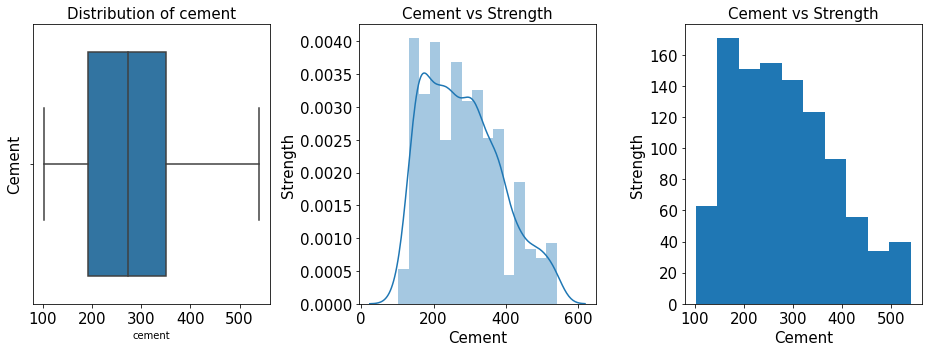

In [16]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='cement',data=df,orient='v',ax=ax1)
ax1.set_ylabel('Cement', fontsize=15)
ax1.set_title('Distribution of cement', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['cement'],ax=ax2)
ax2.set_xlabel('Cement', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Cement vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['cement'])
ax3.set_xlabel('Cement', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Cement vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

## Slag variable

In [17]:
# Range of values 
print('Range of values in slag: ', df['slag'].max()-df['slag'].min())

Range of values in slag:  359.4


In [18]:
#Central values

print('Minimum value slag: ', df['slag'].min())
print('Maximum value slag: ',df['slag'].max())
print('Mean value slag : ', df['slag'].mean())
print('Median value slag: ',df['slag'].median())
print('Standard deviation slag: ', df['slag'].std())
print('Null values slag: ',df['slag'].isnull().any())

Minimum value slag:  0.0
Maximum value slag:  359.4
Mean value slag :  73.89582524271844
Median value slag:  22.0
Standard deviation slag:  86.2793417481054
Null values slag:  False


In [19]:
#Quartiles

Q1=df['slag'].quantile(q=0.25)
Q3=df['slag'].quantile(q=0.75)
print('1st Quartile (Q1) of salg is: ', Q1)
print('3st Quartile (Q3) of slag is: ', Q3)
print('Interquartile range (IQR) of slag is ', stats.iqr(df['slag']))

1st Quartile (Q1) of salg is:  0.0
3st Quartile (Q3) of slag is:  142.95
Interquartile range (IQR) of slag is  142.95


In [20]:
# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in slag: ', L_outliers)
print('Upper outliers in slag: ', U_outliers)

Lower outliers in slag:  -214.42499999999998
Upper outliers in slag:  357.375


In [21]:
print('Number of outliers in slag upper : ', df[df['slag']>357.375]['slag'].count())
print('Number of outliers in slag lower : ', df[df['slag']<-214.425]['slag'].count())
print('% of Outlier in slag upper: ',round(df[df['slag']>357.375]['slag'].count()*100/len(df)), '%')
print('% of Outlier in slag lower: ',round(df[df['slag']<-214.425]['slag'].count()*100/len(df)), '%')

Number of outliers in slag upper :  2
Number of outliers in slag lower :  0
% of Outlier in slag upper:  0 %
% of Outlier in slag lower:  0 %


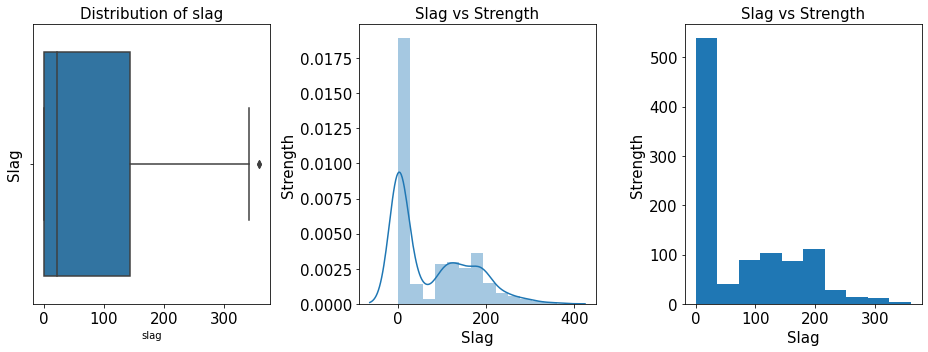

In [22]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='slag',data=df,orient='v',ax=ax1)
ax1.set_ylabel('Slag', fontsize=15)
ax1.set_title('Distribution of slag', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['slag'],ax=ax2)
ax2.set_xlabel('Slag', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Slag vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['slag'])
ax3.set_xlabel('Slag', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Slag vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

## Ash

In [23]:
#Range of values observed

print('Range of values ash : ', df['ash'].max()-df['ash'].min())

Range of values ash :  200.1


In [24]:
#Central values

print('Minimum value ash: ',df['ash'].min())
print('Maximum value ash: ',df['ash'].max())
print('Mean value ash: ', df['ash'].mean())
print('Median value ash: ',df['ash'].median())
print('Standard deviation ash: ', df['ash'].std())
print('Null values ash: ',df['ash'].isnull().any())

Minimum value ash:  0.0
Maximum value ash:  200.1
Mean value ash:  54.188349514563086
Median value ash:  0.0
Standard deviation ash:  63.99700415268794
Null values ash:  False


In [25]:
#Quartiles 

Q1=df['ash'].quantile(q=0.25)
Q3=df['ash'].quantile(q=0.75)
print('1st Quartile (Q1) in ash is: ', Q1)
print('3st Quartile (Q3) in ash is: ', Q3)
print('Interquartile range (IQR) in ash is ', stats.iqr(df['ash']))

1st Quartile (Q1) in ash is:  0.0
3st Quartile (Q3) in ash is:  118.3
Interquartile range (IQR) in ash is  118.3


In [26]:
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in ash: ', L_outliers)
print('Upper outliers in ash: ', U_outliers)

Lower outliers in ash:  -177.45
Upper outliers in ash:  295.75


In [27]:
print('Number of outliers in ash upper : ', df[df['ash']>295.75]['ash'].count())
print('Number of outliers in ash lower : ', df[df['ash']<-177.45]['ash'].count())
print('% of Outlier in ash upper: ',round(df[df['ash']>295.75]['ash'].count()*100/len(df)), '%')
print('% of Outlier in ash lower: ',round(df[df['ash']<-177.45]['ash'].count()*100/len(df)), '%')

Number of outliers in ash upper :  0
Number of outliers in ash lower :  0
% of Outlier in ash upper:  0 %
% of Outlier in ash lower:  0 %


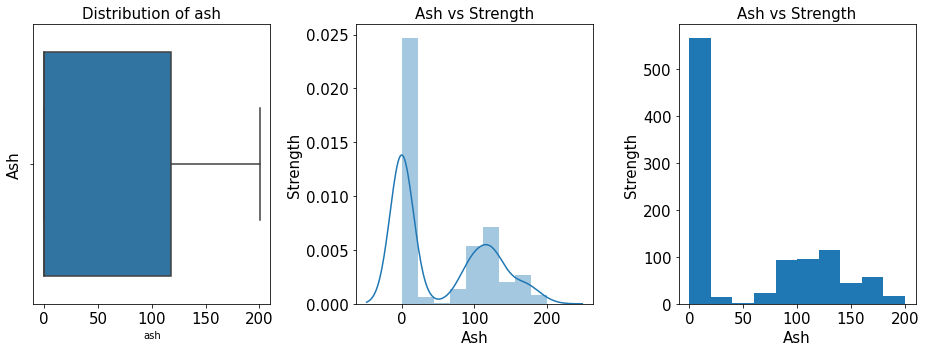

In [28]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='ash',data=df,orient='v',ax=ax1)
ax1.set_ylabel('Ash', fontsize=15)
ax1.set_title('Distribution of ash', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['ash'],ax=ax2)
ax2.set_xlabel('Ash', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Ash vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['ash'])
ax3.set_xlabel('Ash', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Ash vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

# Water

In [29]:
#Range of values observed

print('Range of values in water: ', df['water'].max()-df['water'].min())

Range of values in water:  125.2


In [30]:
#Central values
print('Minimum value in water: ', df['water'].min())
print('Maximum value in water: ',df['water'].max())
print('Mean value water: ', df['water'].mean())
print('Median value water: ',df['water'].median())
print('Standard deviation water: ', df['water'].std())
print('Null values water: ',df['water'].isnull().any())

Minimum value in water:  121.8
Maximum value in water:  247.0
Mean value water:  181.56728155339798
Median value water:  185.0
Standard deviation water:  21.35421856503245
Null values water:  False


In [31]:
#Quartiles
Q1=df['water'].quantile(q=0.25)
Q3=df['water'].quantile(q=0.75)
print('1st Quartile (Q1) in water is: ', Q1)
print('3st Quartile (Q3) in water is: ', Q3)
print('Interquartile range (IQR) in water is ', stats.iqr(df['water']))

1st Quartile (Q1) in water is:  164.9
3st Quartile (Q3) in water is:  192.0
Interquartile range (IQR) in water is  27.099999999999994


In [32]:
# Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in water: ', L_outliers)
print('Upper outliers in water: ', U_outliers)

Lower outliers in water:  124.25000000000001
Upper outliers in water:  232.64999999999998


In [33]:
print('Number of outliers in water upper : ', df[df['water']>232.65]['water'].count())
print('Number of outliers in water lower : ', df[df['water']<124.25]['water'].count())
print('% of Outlier in water upper: ',round(df[df['water']>232.65]['water'].count()*100/len(df)), '%')
print('% of Outlier in water lower: ',round(df[df['water']<124.25]['water'].count()*100/len(df)), '%')

Number of outliers in water upper :  4
Number of outliers in water lower :  5
% of Outlier in water upper:  0 %
% of Outlier in water lower:  0 %


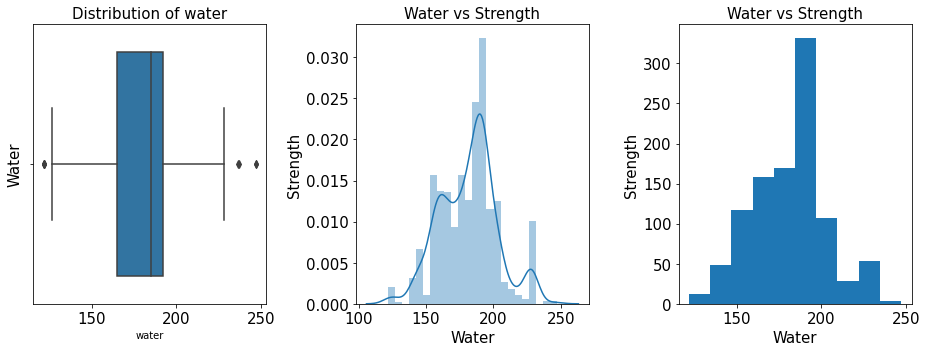

In [34]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='water',data=df,orient='v',ax=ax1)
ax1.set_ylabel('Water', fontsize=15)
ax1.set_title('Distribution of water', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['water'],ax=ax2)
ax2.set_xlabel('Water', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Water vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['water'])
ax3.set_xlabel('Water', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Water vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

## Superplastic

In [35]:
#Range of values observed

print('Range of values in superplastic: ', df['superplastic'].max()-df['superplastic'].min())

Range of values in superplastic:  32.2


In [36]:
#Central values

print('Minimum value in superplastic: ', df['superplastic'].min())
print('Maximum value in superplastic: ',df['superplastic'].max())
print('Mean value in superplastic: ', df['superplastic'].mean())
print('Median value in superplastic: ',df['superplastic'].median())
print('Standard deviation in superplastic: ', df['superplastic'].std())
print('Null values present in superplastic: ',df['superplastic'].isnull().any())

Minimum value in superplastic:  0.0
Maximum value in superplastic:  32.2
Mean value in superplastic:  6.204660194174756
Median value in superplastic:  6.4
Standard deviation in superplastic:  5.973841392485508
Null values present in superplastic:  False


In [37]:
#Quartiles

Q1=df['superplastic'].quantile(q=0.25)
Q3=df['superplastic'].quantile(q=0.75)
print('1st Quartile (Q1) in superplastic is: ', Q1)
print('3st Quartile (Q3) in superplastic is: ', Q3)
print('Interquartile range (IQR) in superplastic is ', stats.iqr(df['superplastic']))

1st Quartile (Q1) in superplastic is:  0.0
3st Quartile (Q3) in superplastic is:  10.2
Interquartile range (IQR) in superplastic is  10.2


In [38]:
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in superplastic: ', L_outliers)
print('Upper outliers in superplastic: ', U_outliers)

Lower outliers in superplastic:  -15.299999999999999
Upper outliers in superplastic:  25.5


In [39]:
print('Number of outliers in superplastic upper : ', df[df['superplastic']>25.5]['superplastic'].count())
print('Number of outliers in superplastic lower : ', df[df['superplastic']<-15.3]['superplastic'].count())
print('% of Outlier in superplastic upper: ',round(df[df['superplastic']>25.5]['superplastic'].count()*100/len(df)), '%')
print('% of Outlier in superplastic lower: ',round(df[df['superplastic']<-15.3]['superplastic'].count()*100/len(df)), '%')

Number of outliers in superplastic upper :  10
Number of outliers in superplastic lower :  0
% of Outlier in superplastic upper:  1 %
% of Outlier in superplastic lower:  0 %


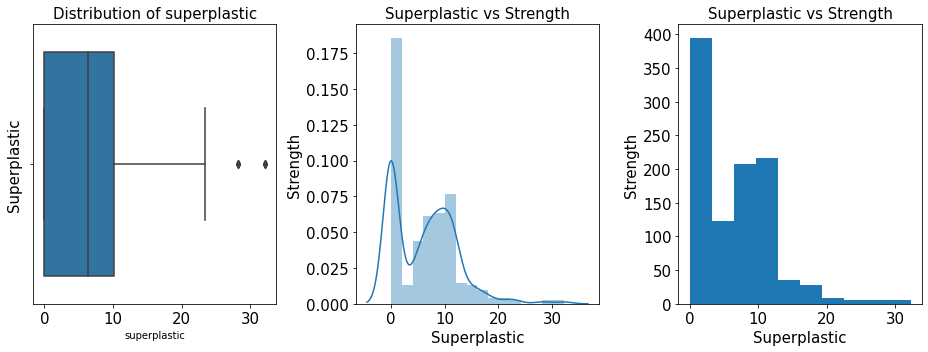

In [40]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='superplastic',data=df,orient='v',ax=ax1)
ax1.set_ylabel('Superplastic', fontsize=15)
ax1.set_title('Distribution of superplastic', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['superplastic'],ax=ax2)
ax2.set_xlabel('Superplastic', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Superplastic vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['superplastic'])
ax3.set_xlabel('Superplastic', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Superplastic vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

# Coarseagg

In [41]:
#Range of values observed

print('Range of values in coarseagg : ', df['coarseagg'].max()-df['coarseagg'].min())

Range of values in coarseagg :  344.0


In [42]:
#Central values

print('Minimum value in coarseagg: ', df['coarseagg'].min())
print('Maximum value in coarseagg: ',df['coarseagg'].max())
print('Mean value in coarseagg: ', df['coarseagg'].mean())
print('Median value in coarseagg: ',df['coarseagg'].median())
print('Standard deviation in coarseagg: ', df['coarseagg'].std())
print('Null values in coarseagg: ',df['coarseagg'].isnull().any())

Minimum value in coarseagg:  801.0
Maximum value in coarseagg:  1145.0
Mean value in coarseagg:  972.918932038835
Median value in coarseagg:  968.0
Standard deviation in coarseagg:  77.75395396672087
Null values in coarseagg:  False


In [43]:
#Quartiles

Q1=df['coarseagg'].quantile(q=0.25)
Q3=df['coarseagg'].quantile(q=0.75)
print('1st Quartile (Q1) in coarseagg is: ', Q1)
print('3st Quartile (Q3) in coarseagg is: ', Q3)
print('Interquartile range (IQR) in coarseagg is ', stats.iqr(df['coarseagg']))

1st Quartile (Q1) in coarseagg is:  932.0
3st Quartile (Q3) in coarseagg is:  1029.4
Interquartile range (IQR) in coarseagg is  97.40000000000009


In [44]:
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in coarseagg: ', L_outliers)
print('Upper outliers in coarseagg: ', U_outliers)

Lower outliers in coarseagg:  785.8999999999999
Upper outliers in coarseagg:  1175.5000000000002


In [45]:
print('Number of outliers in coarseagg upper : ', df[df['coarseagg']>1175.5]['coarseagg'].count())
print('Number of outliers in coarseagg lower : ', df[df['coarseagg']<785.9]['coarseagg'].count())
print('% of Outlier in coarseagg upper: ',round(df[df['coarseagg']>1175.5]['coarseagg'].count()*100/len(df)), '%')
print('% of Outlier in coarseagg lower: ',round(df[df['coarseagg']<785.9]['coarseagg'].count()*100/len(df)), '%')

Number of outliers in coarseagg upper :  0
Number of outliers in coarseagg lower :  0
% of Outlier in coarseagg upper:  0 %
% of Outlier in coarseagg lower:  0 %


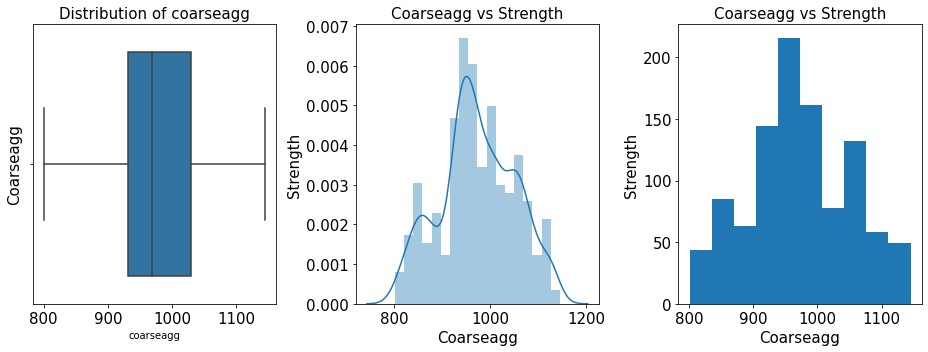

In [46]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='coarseagg',data=df,orient='v',ax=ax1)
ax1.set_ylabel('Coarseagg', fontsize=15)
ax1.set_title('Distribution of coarseagg', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['coarseagg'],ax=ax2)
ax2.set_xlabel('Coarseagg', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Coarseagg vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['coarseagg'])
ax3.set_xlabel('Coarseagg', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Coarseagg vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [47]:
#Range of values observed

print('Range of values in fineagg: ', df['fineagg'].max()-df['fineagg'].min())

Range of values in fineagg:  398.6


In [48]:
#Central Values 

print('Minimum value in fineagg: ', df['fineagg'].min())
print('Maximum value in fineagg: ',df['fineagg'].max())
print('Mean value in fineagg: ', df['fineagg'].mean())
print('Median value in fineagg: ',df['fineagg'].median())
print('Standard deviation in fineagg: ', df['fineagg'].std())
print('Null values in fineagg: ',df['fineagg'].isnull().any())

Minimum value in fineagg:  594.0
Maximum value in fineagg:  992.6
Mean value in fineagg:  773.5804854368932
Median value in fineagg:  779.5
Standard deviation in fineagg:  80.17598014240443
Null values in fineagg:  False


In [49]:
#Quartiles

Q1=df['fineagg'].quantile(q=0.25)
Q3=df['fineagg'].quantile(q=0.75)
print('1st Quartile (Q1) in fineagg is: ', Q1)
print('3st Quartile (Q3) in fineagg is: ', Q3)
print('Interquartile range (IQR) in fineagg is ', stats.iqr(df['fineagg']))

1st Quartile (Q1) in fineagg is:  730.95
3st Quartile (Q3) in fineagg is:  824.0
Interquartile range (IQR) in fineagg is  93.04999999999995


In [50]:
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in fineagg: ', L_outliers)
print('Upper outliers in fineagg: ', U_outliers)

Lower outliers in fineagg:  591.3750000000001
Upper outliers in fineagg:  963.5749999999999


In [51]:
print('Number of outliers in fineagg upper : ', df[df['fineagg']>963.575]['fineagg'].count())
print('Number of outliers in fineagg lower : ', df[df['fineagg']<591.37]['fineagg'].count())
print('% of Outlier in fineagg upper: ',round(df[df['fineagg']>963.575]['fineagg'].count()*100/len(df)), '%')
print('% of Outlier in fineagg lower: ',round(df[df['fineagg']<591.37]['fineagg'].count()*100/len(df)), '%')

Number of outliers in fineagg upper :  5
Number of outliers in fineagg lower :  0
% of Outlier in fineagg upper:  0 %
% of Outlier in fineagg lower:  0 %


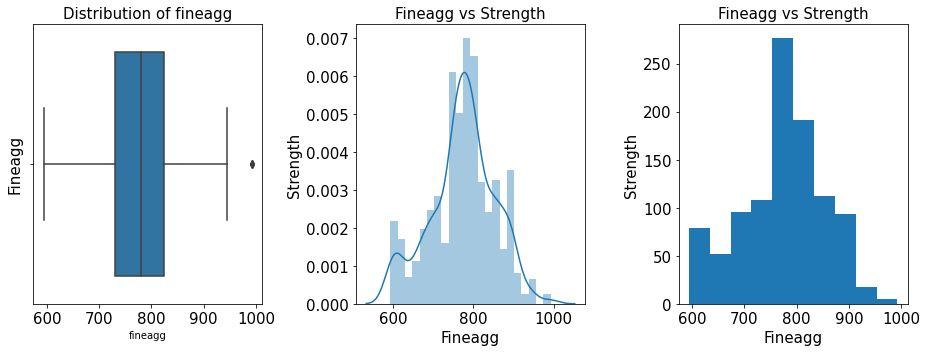

In [52]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='fineagg',data=df,orient='v',ax=ax1)
ax1.set_ylabel('Fineagg', fontsize=15)
ax1.set_title('Distribution of fineagg', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['fineagg'],ax=ax2)
ax2.set_xlabel('Fineagg', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Fineagg vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['fineagg'])
ax3.set_xlabel('Fineagg', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Fineagg vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

## Age

In [53]:
#Range of values observed

print('Range of values in age: ', df['age'].max()-df['age'].min())

Range of values in age:  364


In [54]:
#Central values

print('Minimum value in age: ', df['age'].min())
print('Maximum value in age: ',df['age'].max())
print('Mean value in age: ', df['age'].mean())
print('Median value in age: ',df['age'].median())
print('Standard deviation in age: ', df['age'].std())
print('Null values in age: ',df['age'].isnull().any())

Minimum value in age:  1
Maximum value in age:  365
Mean value in age:  45.662135922330094
Median value in age:  28.0
Standard deviation in age:  63.16991158103279
Null values in age:  False


In [55]:
#Quartiles

Q1=df['age'].quantile(q=0.25)
Q3=df['age'].quantile(q=0.75)
print('1st Quartile (Q1) in age is: ', Q1)
print('3st Quartile (Q3) in age is: ', Q3)
print('Interquartile range (IQR) in age is ', stats.iqr(df['age']))

1st Quartile (Q1) in age is:  7.0
3st Quartile (Q3) in age is:  56.0
Interquartile range (IQR) in age is  49.0


In [56]:
#Outlier detection from Interquartile range (IQR) in original data
# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in age: ', L_outliers)
print('Upper outliers in age: ', U_outliers)

Lower outliers in age:  -66.5
Upper outliers in age:  129.5


In [57]:
print('Number of outliers in age upper : ', df[df['age']>129.5]['age'].count())
print('Number of outliers in age lower : ',df[df['age']<-66.5]['age'].count())
print('% of Outlier in age upper: ',round(df[df['age']>129.5]['age'].count()*100/len(df)), '%')
print('% of Outlier in age lower: ',round(df[df['age']<-66.5]['age'].count()*100/len(df)), '%')

Number of outliers in age upper :  59
Number of outliers in age lower :  0
% of Outlier in age upper:  6 %
% of Outlier in age lower:  0 %


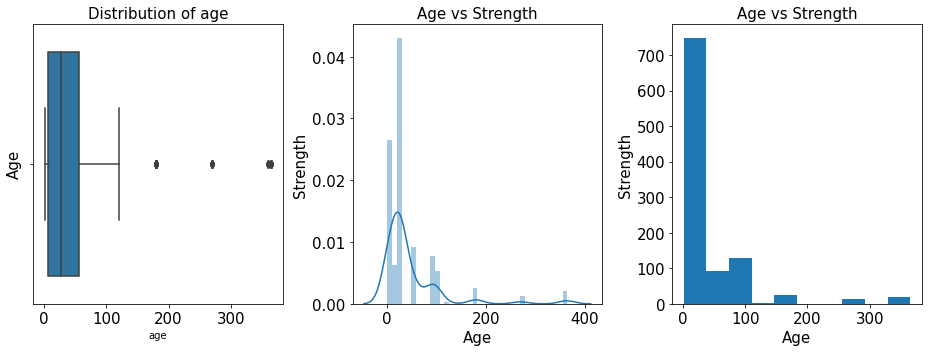

In [58]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='age',data=df,orient='v',ax=ax1)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Distribution of age', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['age'],ax=ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Age vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['age'])
ax3.set_xlabel('Age', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Age vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

<AxesSubplot:xlabel='strength', ylabel='Density'>

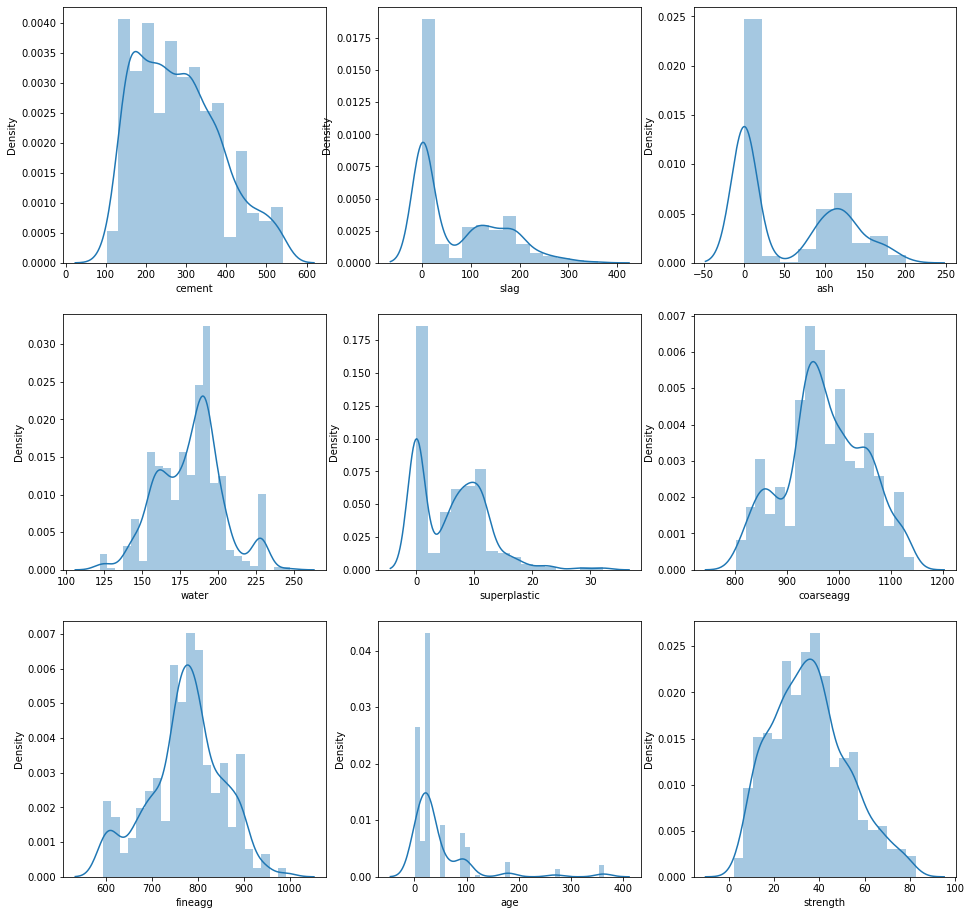

In [59]:
# Distplot
fig, ax2 = plt.subplots(3, 3, figsize=(16, 16))
sns.distplot(df['cement'],ax=ax2[0][0])
sns.distplot(df['slag'],ax=ax2[0][1])
sns.distplot(df['ash'],ax=ax2[0][2])
sns.distplot(df['water'],ax=ax2[1][0])
sns.distplot(df['superplastic'],ax=ax2[1][1])
sns.distplot(df['coarseagg'],ax=ax2[1][2])
sns.distplot(df['fineagg'],ax=ax2[2][0])
sns.distplot(df['age'],ax=ax2[2][1])
sns.distplot(df['strength'],ax=ax2[2][2])

## Observation

We can see observe that :

    cement is almost normal.
    slag has three gausssians and rightly skewed.
    ash has two gaussians and rightly skewed.
    water has three guassians and slighly left skewed.
    superplastic has two gaussians and rightly skewed.
    coarseagg has three guassians and almost normal.
    fineagg has almost two guassians and looks like normal.
    age has multiple guassians and rightly skewed.



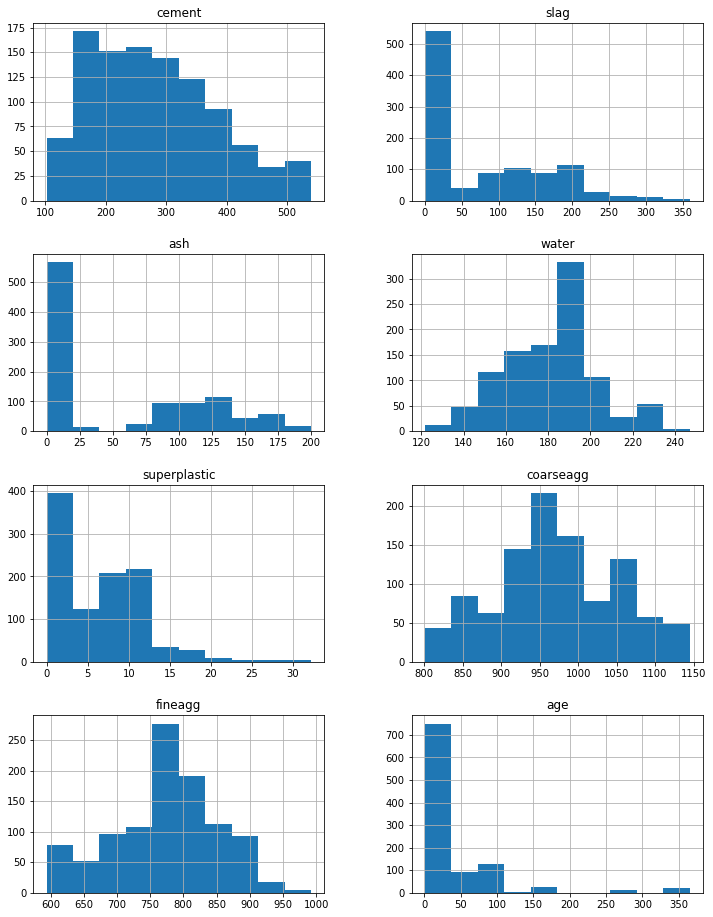

In [60]:
# Let's us only plot the distributions of independent attributes
df.drop('strength',axis=1).hist(figsize=(12,16),layout=(4,2));

##### Observations:
* Disributions of attributes namely age, ash, slag and superplastic show high skewness
* Disribution of cement attribute shows moderate skewness
* Distributions of coarseagg, fineagg and water look normally distributed

In [61]:
# Let's check the skewness values quantitatively
df.skew().sort_values(ascending=False)

age             3.269177
superplastic    0.907203
slag            0.800717
ash             0.537354
cement          0.509481
strength        0.416977
water           0.074628
coarseagg      -0.040220
fineagg        -0.253010
dtype: float64

##### Observations:
* Distribition of most of the columns show positive skewness (long right tail)
* The skewness values show agreement with our qualitative analysis of the distribution plot shown above
* Water and coarseag have approximately symmetric distributions
* Attributes coarseagg and fineagg show negative skewness

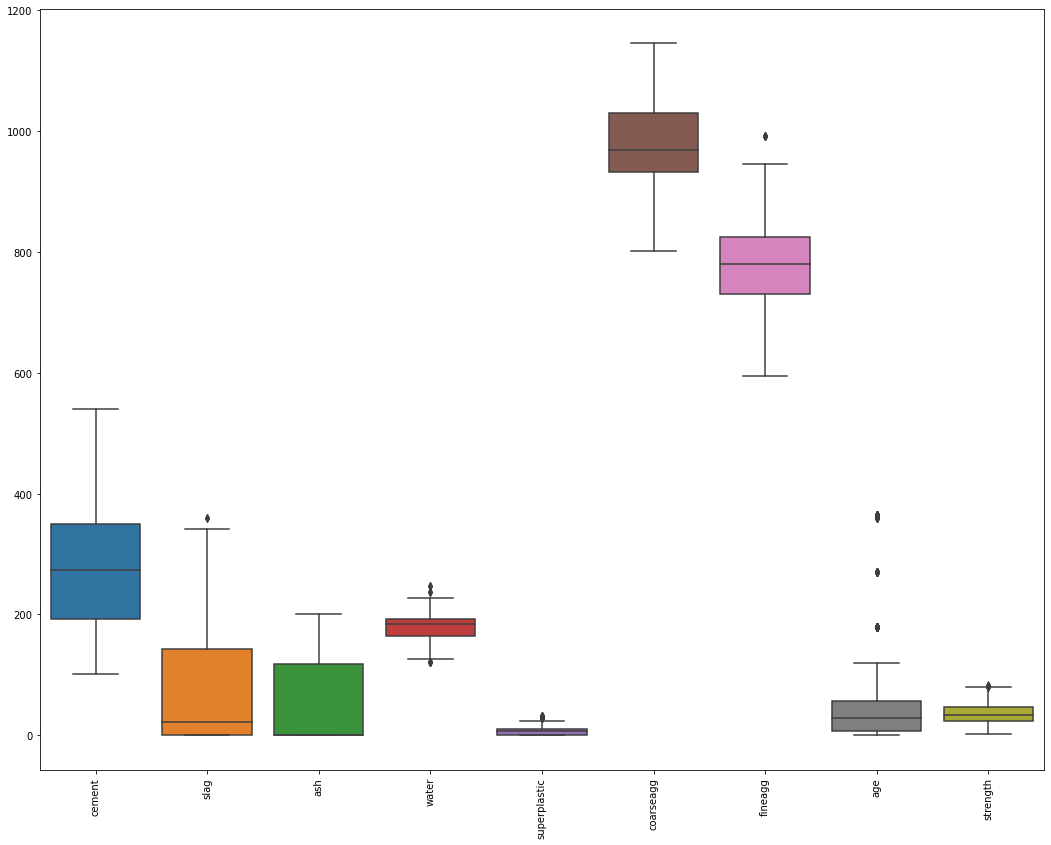

In [62]:
# Let us check presence of outliers
plt.figure(figsize=(18,14))
box = sns.boxplot(data=df)
box.set_xticklabels(labels=box.get_xticklabels(),rotation=90);

##### Observations:
* One can see that, box-plots of independent attributes namely slag, water, superplastic, fineagg and age show outliers
* Target attribute i.e., strength also has outliers
* water attribute shows presence of outliers on both sides of the whiskers
* Box plot of age attribute shows high amount of outliers

# b. Multivariate analysis 

#### i. Bi-variate analysis between the predictor variables and between the
predictor variables and target column. Comment on your findings in terms of
their relationship and degree of relation if any. Presence of leverage points.
Visualize the analysis using boxplots and pair plots, histograms or density
curves. Select the most appropriate attributes

In [63]:
# corrlation matrix 
cor=df.corr()
cor

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


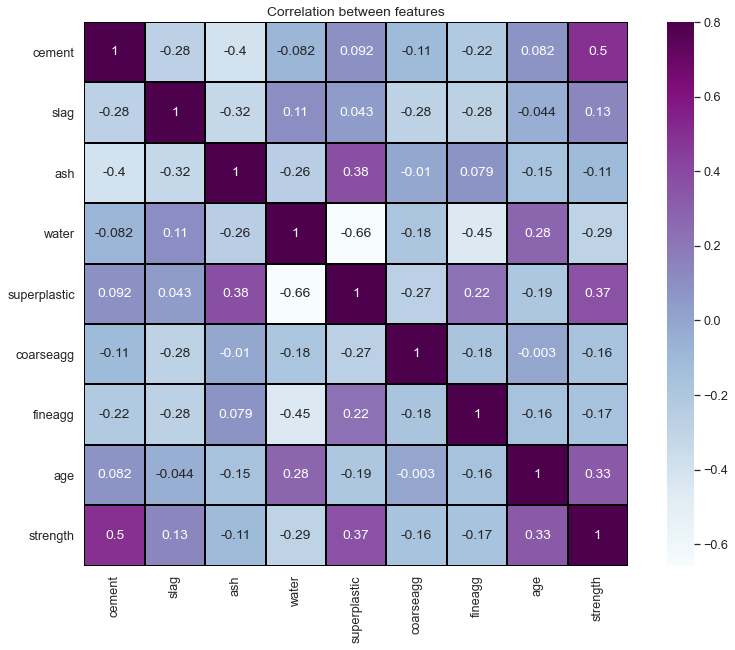

In [64]:
#heatmap
sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))

sns.heatmap(cor, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap="BuPu",linecolor="black")
plt.title('Correlation between features');

**Observations:**
* Target attribute strength is moderately correlated (positive) to cement and to some level superplastic and age. It is  slightly correlated with slag.
* Target attribute is slightly negatively correlated with ash, fineagg and coarseagg. It is negatively correlated with water to some extent.

In [65]:
# Let us see the significant correlation either negative or positive among independent attributes..
c = df.drop('strength',axis=1).corr().abs() # Since there may be positive as well as -ve correlation
s = c.unstack() # 
so = s.sort_values(ascending=False) # Sorting according to the correlation
so=so[(so<1) & (so>0.3)].drop_duplicates().to_frame() # Due to symmetry.. dropping duplicate entries.
so.columns = ['correlation']
so

correlation
water   superplastic     0.657533
fineagg water            0.450661
ash     cement           0.397467
        superplastic     0.377503
slag    ash              0.323580

**Observations:** Assuming correlation values > 0.3 to be significant among the independent variables, one can observe that
* superplastic and water are strongly correlated
* fineagg and water are moderately correlated
* cement and ash, ash and superplastic, slag and ash are also correlated to some extent.

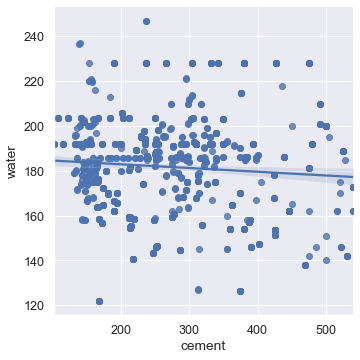

In [66]:
# water vs cement
sns.lmplot(x="cement",y="water",data=df)
plt.show()

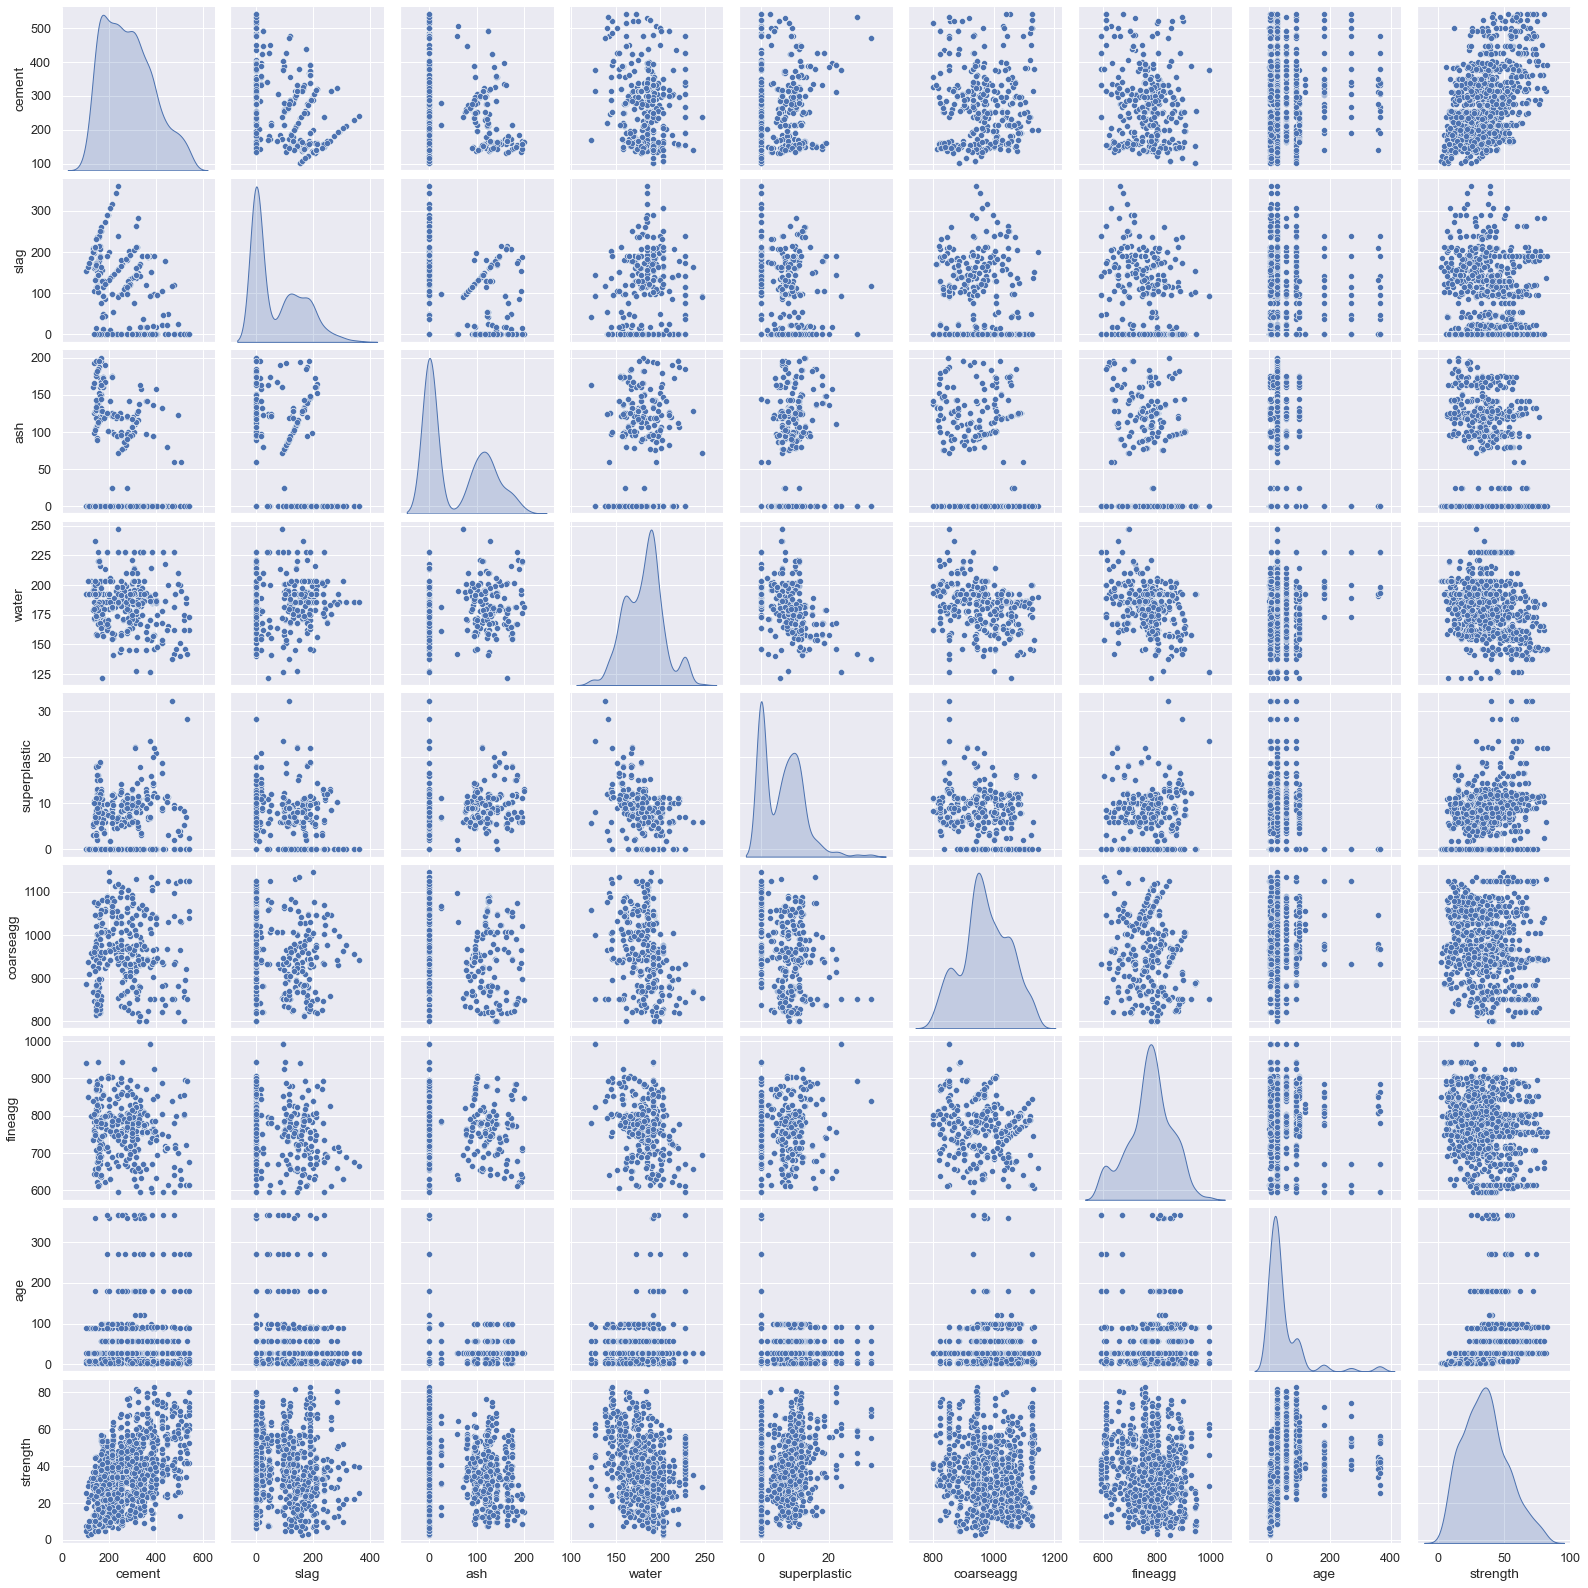

In [67]:
sns.pairplot(df,diag_kind='kde');

**Observations:**
* Target attribute strength do not show any kind of relationship with other independent attributes except cement and superplastic. Attributes cement and superplastic seem to have linear relationship with target attribute.
* Attribute water seems to be negatively related with strength 
* Attribute age do not show any relation with other independent attributes. Slightly non-linear relation can be observed between age and strength
* fineagg and coarseagg shows slight negative linear relationship with water
* superplastic attribute has negative correlation with the water. 
* Except for strength and cement attributes, density curves for most of the attribute show multiple peaks

##### Diagonals Analysis - The diagonal gives the same information, we got using distplot.

    - cement attribute have almost normal curve.
    - slag has two gausssians and rightly skewed.It shows the presence of outlies.
    - ash has two gaussians and rightly skewed.It shows the presence of outlies.
    - water has atleast guassians and slighly left skewed.It shows the presence of outlies.
    - superplastic has multiple gaussians and rightly skewed.It shows the presence of outlies.
    - coarseagg has three guassians and almost normal.
    - fineagg has almost two guassians and looks like normal.
    - age has multiple guassians and rightly skewed. It shows the presence of outlies.
    -strength is close to a normal curve.
    
   ##### There is also outliers problem in the dataset.

##### Off Diagonal Analysis: Relationship between indpendent attributes

##### Scatter plots

    - cement vs other independent attributes: This attribute does not have any significant relation with slag, ash, water, superplatic, coarseagg,fineagg and age. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.
    - slag vs other independent attributes: This attribute also does not have any significant relation with ash, water, superplatic, coarseagg,fineagg and age. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.
    - ash vs other independent attributes: This attribute also does not have any significant relation with water, superplatic, coarseagg,fineagg and age. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.
    - water vs other independent attributes: This attribute have negative linear relationship with superplastic and fineagg. It does not have any significant relationship with other independent atributes. This is true as Superplasticizers allows the reduction of water in the concrete upto the extent of 30% without reducing the workability.
    - superplastic vs other independent attributes:This attribute have negative linear relationship with water only. It does not have any significant relationship with other independent attributes.
    - coarseagg vs other independent attributes:This attribute also does not have any significant relation with any other attributes. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.
    - fineagg vs other independent attributes:It has negative linear relationship with water. It does not have any significant relation with any other attributes. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.

The reason why we are doing all this analysis is if we find any kind of dimensions which are very strongly correlated i.e. r value close to 1 or -1 such dimensions are giving same information to your algorithms, its a redundant dimension. So in such cases we may want to keep one and drop the other which we should keep and which we should drop depends on again your domain expertise, which one of the dimension is more prone to errors.I would like to drop that dimension. Or we have a choice to combine these dimensions and create a composite dimension out of it.

##### strength attribute : Relationship between dependent and independent attributes

##### strength: Now its comparing the target column with all other independent attributes and its showing us very vital information.

##### strength vs cement:  
It is linearly related to the cement. The relationship is positive and we can see that for a given value of cement we have a multiple values of strength. Which one should we pick we don't know. Hence Cement though it has poditive relationship with the strength, it is not a very good predictor. It is a weak predictor. strength vs slag: There is no particular trend. strength vs slag: There is also no particular trend. strength vs age: For a given value of age, we have different values of strength. Hence, It is not a good predictor. strength vs superplastic:For a given value of age, we have different values of strength. Hence, It is not a good predictor. Other attributes does not give any strong relationship with strength. Hence, we can see that none of the independent attributes are a good predictors of the strength attribute. There is a no linear relationship between them.

##### So, we will not use Linear model


## 1.c- Pick one strategy to address the presence outliers and missing values and perform necessary imputation 

<AxesSubplot:>

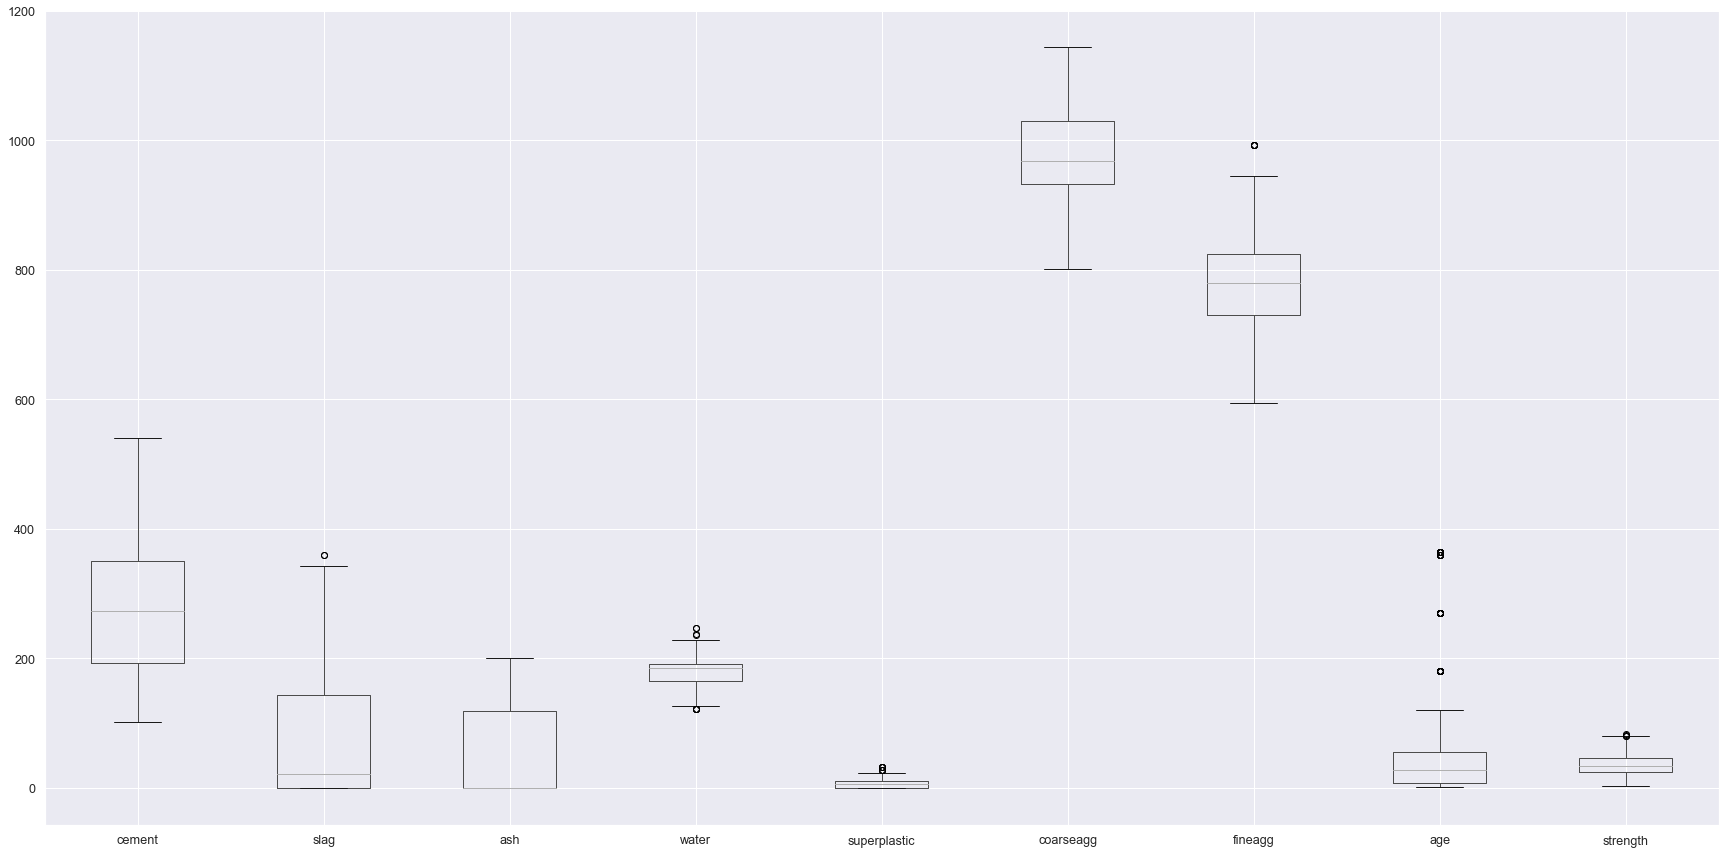

In [68]:
#Checking for outliers
concrete_df1=df.copy()
concrete_df1.boxplot(figsize=(30,15))

#### Observation
* It also shows that slag, ash, water superplastic, and age contains outliers.

In [69]:
#Number of outliers present in the dataset
print('Number of outliers in cement: ',concrete_df1[((concrete_df1.cement - concrete_df1.cement.mean()) / concrete_df1.cement.std()).abs() >3]['cement'].count())
print('Number of outliers in slag: ',concrete_df1[((concrete_df1.slag - concrete_df1.slag.mean()) / concrete_df1.slag.std()).abs() >3]['slag'].count())
print('Number of outliers in ash: ',concrete_df1[((concrete_df1.ash - concrete_df1.ash.mean()) / concrete_df1.ash.std()).abs() >3]['ash'].count())
print('Number of outliers in water: ',concrete_df1[((concrete_df1.water - concrete_df1.water.mean()) / concrete_df1.water.std()).abs() >3]['water'].count())
print('Number of outliers in superplastic: ',concrete_df1[((concrete_df1.superplastic - concrete_df1.superplastic.mean()) / concrete_df1.superplastic.std()).abs() >3]['superplastic'].count())
print('Number of outliers in coarseagg: ',concrete_df1[((concrete_df1.coarseagg - concrete_df1.coarseagg.mean()) / concrete_df1.coarseagg.std()).abs() >3]['coarseagg'].count())
print('Number of outliers in fineagg: ',concrete_df1[((concrete_df1.fineagg - concrete_df1.fineagg.mean()) / concrete_df1.fineagg.std()).abs() >3]['fineagg'].count())
print('Number of outliers in age: ',concrete_df1[((concrete_df1.age - concrete_df1.age.mean()) / concrete_df1.age.std()).abs() >3]['age'].count())

Number of outliers in cement:  0
Number of outliers in slag:  4
Number of outliers in ash:  0
Number of outliers in water:  2
Number of outliers in superplastic:  10
Number of outliers in coarseagg:  0
Number of outliers in fineagg:  0
Number of outliers in age:  33




    1. Here, we have used Standard deviation method to detect the outliers.If we have any data point that is more than 3 times the standard deviation, then those points are very likely to be outliers.
    2. We can see that slag, water, superplastic and age contain outliers.



In [70]:
print('Records containing outliers in slag: \n',concrete_df1[((concrete_df1.slag - concrete_df1.slag.mean()) / concrete_df1.slag.std()).abs() >3]['slag'])

Records containing outliers in slag: 
 21     342.1
564    342.1
918    359.4
990    359.4
Name: slag, dtype: float64


In [71]:
print('Records containing outliers in water: \n',concrete_df1[((concrete_df1.water - concrete_df1.water.mean()) / concrete_df1.water.std()).abs() >3]['water'])

Records containing outliers in water: 
 66     247.0
263    246.9
Name: water, dtype: float64


In [72]:
print('Records containing outliers in superplastic: \n',concrete_df1[((concrete_df1.superplastic - concrete_df1.superplastic.mean()) / concrete_df1.superplastic.std()).abs() >3]['superplastic'])

Records containing outliers in superplastic: 
 44      28.2
156     28.2
232     32.2
292     32.2
538     28.2
744     32.2
816     32.2
838     28.2
955     32.2
1026    28.2
Name: superplastic, dtype: float64


In [73]:
print('Records containing outliers in age: \n',concrete_df1[((concrete_df1.age - concrete_df1.age.mean()) / concrete_df1.age.std()).abs() >3]['age'])

Records containing outliers in age: 
 64      365
133     365
149     270
157     360
159     365
198     365
256     270
262     270
270     270
297     270
313     270
323     360
361     360
393     365
448     360
465     365
484     365
570     270
601     365
623     270
632     270
713     365
720     365
754     365
755     360
850     270
878     270
901     365
919     360
951     270
957     365
995     365
1028    270
Name: age, dtype: int64


# let us remove the outliers
for column in df.columns.tolist():
    Q1 = df[column].quantile(.25) # 1st quartile
    Q3 = df[column].quantile(.75) # 3rd quartile
    IQR = Q3-Q1 # get inter quartile range
    # Replace elements of columns that fall below Q1-1.5*IQR and above Q3+1.5*IQR
    df[column].replace(df.loc[(df[column] > Q3+1.5*IQR)|(df[column] < Q1-1.5*IQR), column], df[column].median(),inplace=True)

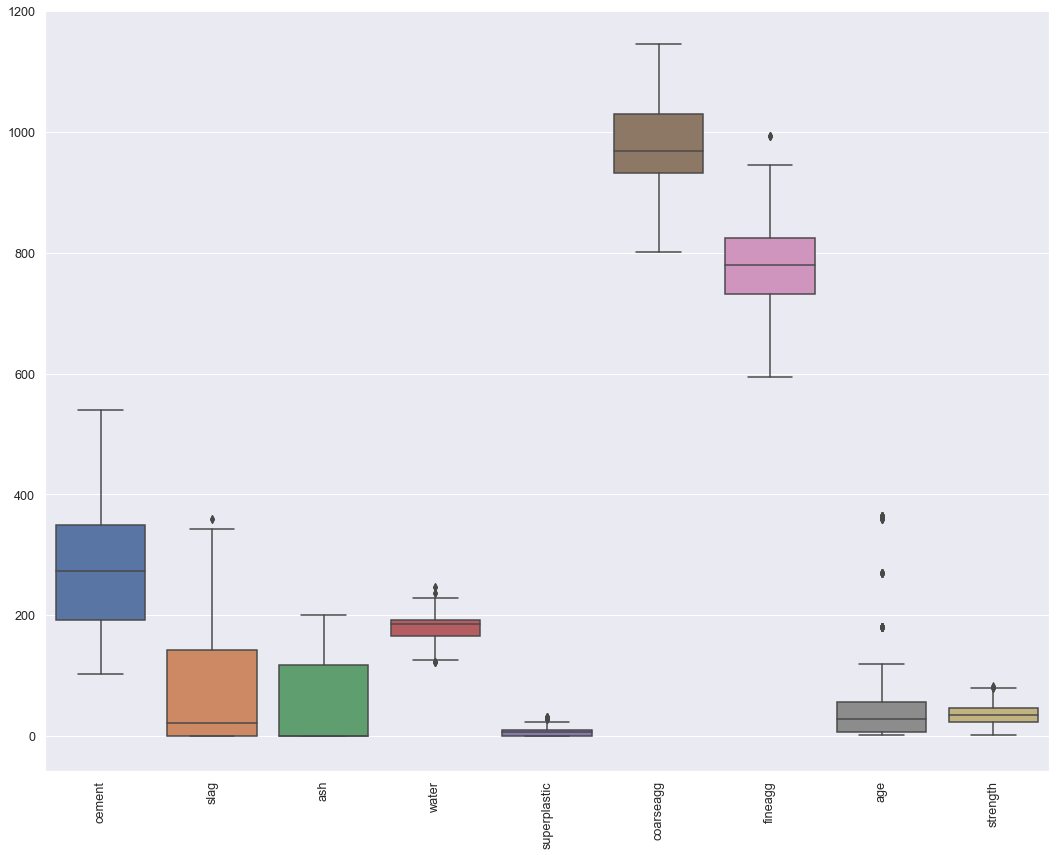

In [74]:
# Let us check presence of outliers
plt.figure(figsize=(18,14))
box = sns.boxplot(data=df)
box.set_xticklabels(labels=box.get_xticklabels(),rotation=90);

**Observations after outlier removal:**
* Outliers are completely removed from slag, water, superplastic attributes
* New outliers below first quartile are created in fineagg column. However, we are not going to treat them again.
* Age attribute still shows some outliers
* Outliers in the strength column are not removed completely.

## 2. Deliverable -2 (Feature Engineering techniques)
* 2.a. Identify opportunities (if any) to create a composite feature, drop a feature
* 2.b. Decide on complexity of the model, should it be simple linear model in terms of parameters or would a quadratic or higher degree help
* 2.c. Explore for gaussians. If data is likely to be a mix of gaussians, explore individual clusters and present your findings in terms of the independent attributes and their suitability to predict strength

### 2.a Identify opportunities (if any) to create a composite feature, drop a feature

In [75]:
# Let's add this new composite feature before target attribute.
df.insert(8,'water/cement',df['water']/df['cement'])

df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,water/cement,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,1.440198,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,0.937241,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,0.749600,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,0.857143,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,1.248708,18.29


In [76]:
df.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,water/cement,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,-0.879130,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.357322,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,0.246004,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,0.332968,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,-0.223215,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.034255,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,0.066595,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,-0.029268,0.328873
water/cement,-0.879130,0.357322,0.246004,0.332968,-0.223215,-0.034255,0.066595,-0.029268,1.000000,-0.500692
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,-0.500692,1.000000


##### Observation: 


One can see that, the newly added feature is moderately correlated (negatively) with target attribute 

**Dropping a feature: We won't drop any feature for the time being, however after feature engineering stage, we may choose to drop some features to avoid overfitting** 

## 2.b. Decide on complexity of the model, should it be simple linear model in terms of parameters or would a quadratic or higher degree help

As provided in the dataset information the strength of the concrete is a highly nonlinear function of age and ingredients. Thus using a simple linear model won't help in this problem to get better modeling accuracy. Use of quadratic and higher degree makes sense in this case to incorporate the nonlinear relationship between target and independent attributes

##### In order to incorporate the non-linear feature interaction among independent features we choose to add polynomial features with degree 3. ( i had tried out degree 2 first and then selected 3)

In [77]:
poly3 = PolynomialFeatures(degree = 3, interaction_only=True)
poly3_ft = poly3.fit_transform(df.drop('strength',axis=1))
df_poly3= pd.DataFrame(poly3_ft,columns=['feat_'+str(x) for x in range(poly3_ft.shape[1])])
df_poly3.head()

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_120,feat_121,feat_122,feat_123,feat_124,feat_125,feat_126,feat_127,feat_128,feat_129
0,1.0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28.0,1.440198,...,0.000,0.00,0.000000,0.00,0.000000,0.000000,20366984.40,1.047589e+06,39188.368011,30183.673036
1,1.0,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14.0,0.937241,...,9293755.968,163416.96,10940.076448,120385.44,8059.297620,141.710835,12047461.44,8.065267e+05,14181.580580,10447.237655
2,1.0,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28.0,0.749600,...,4532452.540,147362.60,3945.107320,132624.80,3550.555360,115.438400,23074303.84,6.177321e+05,20084.182720,18075.554560
3,1.0,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0,0.857143,...,0.000,0.00,0.000000,0.00,0.000000,0.000000,17484320.00,5.352343e+05,22368.000000,16080.000000
4,1.0,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28.0,1.248708,...,6640484.578,266877.52,11901.860607,177519.16,7916.771324,318.170801,20432260.24,9.112117e+05,36621.109561,24359.296382


In [78]:
# Let us create the dataframe with all features
df_feat = df.drop('strength',axis=1).join(df_poly3)
df_feat['strength'] = df['strength']
print(df_feat.shape)
df_feat.head()

(1030, 140)


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,water/cement,feat_0,...,feat_121,feat_122,feat_123,feat_124,feat_125,feat_126,feat_127,feat_128,feat_129,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,1.440198,1.0,...,0.00,0.000000,0.00,0.000000,0.000000,20366984.40,1.047589e+06,39188.368011,30183.673036,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,0.937241,1.0,...,163416.96,10940.076448,120385.44,8059.297620,141.710835,12047461.44,8.065267e+05,14181.580580,10447.237655,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,0.749600,1.0,...,147362.60,3945.107320,132624.80,3550.555360,115.438400,23074303.84,6.177321e+05,20084.182720,18075.554560,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,0.857143,1.0,...,0.00,0.000000,0.00,0.000000,0.000000,17484320.00,5.352343e+05,22368.000000,16080.000000,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,1.248708,1.0,...,266877.52,11901.860607,177519.16,7916.771324,318.170801,20432260.24,9.112117e+05,36621.109561,24359.296382,18.29


In [79]:
df_feat.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,water/cement,feat_0,...,feat_121,feat_122,feat_123,feat_124,feat_125,feat_126,feat_127,feat_128,feat_129,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,1.440198,1.0,...,0.00,0.000000,0.00,0.000000,0.000000,20366984.40,1.047589e+06,39188.368011,30183.673036,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,0.937241,1.0,...,163416.96,10940.076448,120385.44,8059.297620,141.710835,12047461.44,8.065267e+05,14181.580580,10447.237655,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,0.749600,1.0,...,147362.60,3945.107320,132624.80,3550.555360,115.438400,23074303.84,6.177321e+05,20084.182720,18075.554560,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,0.857143,1.0,...,0.00,0.000000,0.00,0.000000,0.000000,17484320.00,5.352343e+05,22368.000000,16080.000000,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,1.248708,1.0,...,266877.52,11901.860607,177519.16,7916.771324,318.170801,20432260.24,9.112117e+05,36621.109561,24359.296382,18.29


**The newly created dataframe with features contains 139 independent and 1 target attribute. Since, all the features will not be useful, we apply LASSO regularization step and select the most relevant features. This will also reduce the problem of overfitting models.**

In [80]:
from sklearn.linear_model import Lasso
X = df_feat.drop('strength',axis=1)
y = df_feat['strength']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lasso = Lasso() # Since it uses L1 reglarization features with zero coefficients will be insignificant.
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))
# Let's us get the features selected by Lasso
lasso_feat = X_train.columns[lasso.coef_!=0].tolist() # Dropping the features with 0 coefficient value
print(lasso_feat) # Features selected using LASSO regularization
print("Out of total {} independent features, number of features selected by LASSO regularization are {} ".format(X_train.shape[1],len(lasso_feat)))
df_feat = df_feat[lasso_feat] # Select independent features 
df_feat.head()

Lasso model: [ 9.36261145e-02 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -3.19963541e-02  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  7.69605615e-03 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -1.58792934e-03  0.00000000e+00 -0.00000000e+00 -1.73075281e-04
 -2.01176178e-04 -3.56299907e-04 -1.63375790e-03  9.30498802e-05
 -3.59018932e-05 -8.67637327e-05  0.00000000e+00 -4.09362681e-04
  3.02310618e-05  8.18782550e-03 -4.72770847e-05 -1.67582841e-06
  1.71028328e-03 -0.00000000e+00  3.35523632e-04  2.21381349e-03
 -1.30105722e-04  1.18305110e-04  1.31214308e-03  0.00000000e+00
  6.53187043e-03  1.06284484e-04  2.22576434e-04  4.62481310e-04
 -5.85797321e-03  3.40271161e-04 -1.13429938e-03  1.43450818e-02
 -0.00000000e+00  1.17361234e-05 -3.66178099e-05 -1.94916196e-02
  1.81028468e-05 -0.00000000e+00  0.00000000e+00 -1.61238696e-06
  1.46513458e-06 -3.42197516e-07 -5.97228982e-07  4.71200219e-07
 -2.38435007

,cement,fineagg,feat_1,feat_7,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,...,feat_120,feat_121,feat_122,feat_123,feat_124,feat_125,feat_126,feat_127,feat_128,feat_129
0,141.3,748.5,141.3,748.5,29955.60,0.00,28754.55,0.00,137315.34,105763.05,...,0.000,0.00,0.000000,0.00,0.000000,0.000000,20366984.40,1.047589e+06,39188.368011,30183.673036
1,168.9,796.2,168.9,796.2,7127.58,20994.27,26736.87,1824.12,182547.12,134478.18,...,9293755.968,163416.96,10940.076448,120385.44,8059.297620,141.710835,12047461.44,8.065267e+05,14181.580580,10447.237655
2,250.0,861.2,250.0,861.2,0.00,23925.00,46850.00,1375.00,239225.00,215300.00,...,4532452.540,147362.60,3945.107320,132624.80,3550.555360,115.438400,23074303.84,6.177321e+05,20084.182720,18075.554560
3,266.0,670.0,266.0,670.0,30324.00,0.00,60648.00,0.00,247912.00,178220.00,...,0.000,0.00,0.000000,0.00,0.000000,0.000000,17484320.00,5.352343e+05,22368.000000,16080.000000
4,154.8,696.7,154.8,696.7,28390.32,0.00,29922.84,1408.68,162137.52,107849.16,...,6640484.578,266877.52,11901.860607,177519.16,7916.771324,318.170801,20432260.24,9.112117e+05,36621.109561,24359.296382


##### Observation:
- We did feature enginering in 2b via polynomial features with degree 3, which created 130 new features. We mergered the same with orginal dataset, so the features became 140.
- Then we did LASSO regularization to select important features, and the dataset camedown to 118 features.

### 2.c. Explore for gaussians. If data is likely to be a mix of gaussians, explore individual clusters and present your findings in terms of the independent attributes and their suitability to predict strength

In [81]:
from sklearn.cluster import KMeans
df_z = df_orig.apply(zscore) # Get the normalized dataframe
cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 10 )
  clusters.fit(df_z)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:14]

NameError: name 'df_orig' is not defined